# Tool to extract usefull information from mlperf trace

In [438]:
%matplotlib inline
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import json
import os
import seaborn as sns
from operator import itemgetter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

figsize=(10, 5)
font=10

plt.figure(dpi=600)
plt.rc('xtick', labelsize=font) 
plt.rc('font', size=font)
sns.set(font_scale=1.4, style="whitegrid");

<Figure size 3600x2400 with 0 Axes>

In [512]:
def trace_to_df(fname):
    with open(fname, "r") as f:
        print(f)
        j = json.load(f)
    if type(j) == dict:
        j = j['traceEvents']
        
    result = []
    for item in j:
        name = item['name']
        if name not in ["Latency", "Sample", "QuerySamplesComplete", "IssueQuery"]:
            continue

        args = item.get('args')
        d = {"ts": item['ts'], "name": name, "dur": item.get("dur")}

        if name == "Latency":
            d["issue_delay"] = args["issue_delay"] /1e9
            d["issue_to_done"] = args["issue_to_done"] / 1e9
            result.append(d)
        elif name == "Sample":
            if args:
                d["issue_start_ns"] = args["issue_start_ns"]
                d["complete_ns"] = args["complete_ns"]
                d["issue_to_done"] = (args["complete_ns"] - args["issue_start_ns"]) / 1e9
                result.append(d)
        elif name == "QuerySamplesComplete":
            result.append(d)
        elif name == "IssueQuery":
            result.append(d)

    df = pd.DataFrame(result)
    df = df.sort_values(by=["ts"])
    return df

BINS = 10

In [513]:
# Fixing bin edges
HIST_BINS = np.linspace(0, 1000000, 100)

In [514]:
df = trace_to_df('/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-1-32-O-1-10/mlperf_log_trace.json')
df.describe()

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-1-32-O-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>


,ts,dur,issue_start_ns,complete_ns,issue_to_done
count,4.915300e+04,2.457700e+04,24576.0,2.457600e+04,24576.000000
mean,5.896530e+07,9.064496e+03,519.0,1.175982e+11,117.598165
std,7.580279e+07,1.420478e+06,0.0,6.765727e+10,67.657268
min,1.674089e+05,1.559000e+00,519.0,7.957850e+08,0.795784
25%,1.674089e+05,2.918000e+00,519.0,5.901068e+10,59.010678
50%,1.674097e+05,3.191000e+00,519.0,1.174500e+11,117.449963
75%,1.176155e+08,3.466000e+00,519.0,1.763415e+11,176.341468
max,2.350200e+08,2.226891e+08,519.0,2.348526e+11,234.852616


In [515]:
df["name"].unique()

array(['Sample', 'IssueQuery', 'QuerySamplesComplete'], dtype=object)

In [516]:
df

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
0,1.674089e+05,Sample,NaN,519.0,7.957850e+08,0.795784
27322,1.674089e+05,Sample,NaN,519.0,1.305755e+11,130.575495
27320,1.674089e+05,Sample,NaN,519.0,1.305736e+11,130.573554
27318,1.674089e+05,Sample,NaN,519.0,1.305685e+11,130.568524
27316,1.674089e+05,Sample,NaN,519.0,1.305609e+11,130.560940
...,...,...,...,...,...,...
49144,2.350133e+08,QuerySamplesComplete,2.605,NaN,NaN,NaN
49146,2.350156e+08,QuerySamplesComplete,2.788,NaN,NaN,NaN
49148,2.350163e+08,QuerySamplesComplete,2.954,NaN,NaN,NaN
49150,2.350182e+08,QuerySamplesComplete,3.072,NaN,NaN,NaN


In [517]:
df1 = df[df["name"].isin(["Sample"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
0,167408.926,Sample,NaN,519.0,7.957850e+08,0.795784
27322,167408.926,Sample,NaN,519.0,1.305755e+11,130.575495
27320,167408.926,Sample,NaN,519.0,1.305736e+11,130.573554
27318,167408.926,Sample,NaN,519.0,1.305685e+11,130.568524
27316,167408.926,Sample,NaN,519.0,1.305609e+11,130.560940
...,...,...,...,...,...,...
2516,167408.926,Sample,NaN,519.0,1.255178e+10,12.551780
2004,167408.926,Sample,NaN,519.0,1.013901e+10,10.139005
8194,167408.926,Sample,NaN,519.0,3.956373e+10,39.563729
7718,167408.926,Sample,NaN,519.0,3.728248e+10,37.282479


In [518]:
df1 = df[df["name"].isin(["IssueQuery"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
46592,167409.695,IssueQuery,2.226891e+08,NaN,NaN,NaN


In [519]:
df1 = df[df["name"].isin(["Latency"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done


In [520]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
1,9.631954e+05,QuerySamplesComplete,29.786,NaN,NaN,NaN
3,1.130295e+06,QuerySamplesComplete,10.170,NaN,NaN,NaN
5,1.149159e+06,QuerySamplesComplete,24.483,NaN,NaN,NaN
7,1.169383e+06,QuerySamplesComplete,21.773,NaN,NaN,NaN
9,1.188150e+06,QuerySamplesComplete,21.100,NaN,NaN,NaN
...,...,...,...,...,...,...
49144,2.350133e+08,QuerySamplesComplete,2.605,NaN,NaN,NaN
49146,2.350156e+08,QuerySamplesComplete,2.788,NaN,NaN,NaN
49148,2.350163e+08,QuerySamplesComplete,2.954,NaN,NaN,NaN
49150,2.350182e+08,QuerySamplesComplete,3.072,NaN,NaN,NaN


# server scenario

In [521]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

path = "/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/"
all_files = glob.glob(path + "*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)
df.head()

,benchmark,k8senv,sbatch,numctn,cscenario,cbatch,reps,qps,mean,p50,p80,p90,p95,p99,p999
0,resnet,none,32,1,offline,1,10,103.954691,27.992662,28.002967,44.305284,50.239967,52.863702,55.099381,55.472420
1,resnet,none,32,2,offline,1,10,138.806355,14.078683,14.135280,20.806620,23.199871,24.680169,26.074433,26.518482
2,resnet,none,32,4,offline,1,10,139.327516,14.390460,14.649536,20.930097,23.234994,24.555063,25.855541,26.732344
3,resnet,none,32,8,offline,1,10,141.660083,13.055557,13.241904,19.415917,21.730290,22.761770,24.134147,26.413375
4,resnet,none,32,16,offline,1,10,140.232882,12.088689,12.139470,18.112399,20.207223,21.703540,24.086299,27.363607


In [522]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
%matplotlib inline
dfg = df
dfg

,benchmark,k8senv,sbatch,numctn,cscenario,cbatch,reps,qps,mean,p50,p80,p90,p95,p99,p999
0,resnet,none,32,1,offline,1,10,103.954691,27.992662,28.002967,44.305284,50.239967,52.863702,55.099381,55.472420
1,resnet,none,32,2,offline,1,10,138.806355,14.078683,14.135280,20.806620,23.199871,24.680169,26.074433,26.518482
2,resnet,none,32,4,offline,1,10,139.327516,14.390460,14.649536,20.930097,23.234994,24.555063,25.855541,26.732344
3,resnet,none,32,8,offline,1,10,141.660083,13.055557,13.241904,19.415917,21.730290,22.761770,24.134147,26.413375
4,resnet,none,32,16,offline,1,10,140.232882,12.088689,12.139470,18.112399,20.207223,21.703540,24.086299,27.363607
5,resnet,none,32,32,offline,1,10,164.685025,5.904270,5.828273,8.507715,9.604956,10.203654,11.860360,12.943690
6,resnet,cpumemory,32,1,offline,1,10,104.290164,27.815454,27.871936,44.028208,49.928936,52.601753,54.629726,55.093692
7,resnet,cpumemory,32,2,offline,1,10,153.065408,9.045512,9.066598,13.940309,15.621694,17.027113,18.235479,18.725918
8,resnet,cpumemory,32,4,offline,1,10,156.627665,7.951230,7.977295,12.194422,13.763392,14.765385,16.241118,17.534004
9,resnet,cpumemory,32,8,offline,1,10,158.900422,7.671346,7.607700,11.626676,13.138849,14.040744,15.421605,16.698551


In [523]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF
from reportlab.pdfgen import canvas

from numpy import percentile, mean, std
import plotly.graph_objects as go

from plotly.offline import init_notebook_mode, iplot

import plotly.io as pio
pio.templates.default = "none"
# pio.templates.default = "simple_white"

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
# import plotly.express as px

for x in ['qps','mean','p99']:
    for cbatch in [1]:
        for model_name in ['resnet']:
            list_traces = []
            for numctn in [1,2,4,8,16,32]: 
                dfg_bench = dfg[(dfg['benchmark']== model_name)  & (dfg['cbatch']==cbatch) & (dfg['numctn']==numctn) &\
                            ((dfg['k8senv']=='none') |\
                             (dfg['k8senv']=='cpumem')| (dfg['k8senv']=='cpumemory'))]
#                 print(dfg_bench)


                #data
                trace = go.Scatter(
                    name="ctn"+str(numctn),
                    x=[ 'none','cpumem','cpu'],
                    y= dfg_bench[x].values.tolist(),
        #             error_y = dict(type='data', array=df1_bench['model_time_std'].values.tolist()),
                    opacity=0.7,
                    mode='markers'
                )
                list_traces.append(trace)



            #layout
            layout = go.Layout(
                title={
                    'text': "exp18(cpu32)= inter16,intra32 -> inter1,intra2; restapi=32" ,
                    'y':0.85,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                width=1000,
                height=460,
                xaxis=dict(
                    title= "scenarios",
                    tickvals=[ 'none','cpumem','cpu'],
                    titlefont=dict(
                        size=10,
                        color='rgb(107, 107, 107)'
                    ),
                    tickfont=dict(
                        size=10,
                        color='rgb(107, 107, 107)'
                    )
                ),
                yaxis=dict(
                    title= x+"batch"+str(cbatch),
                    automargin=True,
                    titlefont=dict(
                        size=25,
                        color='rgb(107, 107, 107)'
                    ),
                    tickfont=dict(
                        size=25,
                        color='rgb(107, 107, 107)'
                    ),    
                ),
                legend=dict(
                    x=1.0,
                    y=1.0,
                    bgcolor='rgba(255, 255, 255, 0)',
                    bordercolor='rgba(255, 255, 255, 0)',
                    font = dict( size = 28)
                ),
                barmode='group',
                bargap=0.15,
                bargroupgap=0.08
        #         legend_orientation="h"
            )

        data = list_traces
        fig = go.Figure(data=data, layout=layout)
        fig.update_layout(legend_orientation="h")
        fig.show()    

    #     fig.write_image(path + model_name + k8senv +'.pdf')

In [524]:
#y is the issue_start_ns
# df1 = df[df["name"].isin(["Sample"])]
# df1.reset_index(drop=True,inplace=True)
# ax = df1['issue_start_ns'].plot(figsize=figsize)
# ax.set(xlim=(0, 25000))
# ax.set_title('issue start time (usec)');

In [525]:
# df1['issue_start_ns'].sort_values

In [526]:
# df_time=df1['issue_start_ns'].shift()
# df_time
# df_time.dtype

In [527]:
#time poisson
# ax = df_time.plot(figsize=figsize)
# ax.set(xlim=(0, 10000))
# ax.set_title('issue start time (usec)');

In [528]:
# color=["blue","green","yellow","red","orange","grey"]
# x=0
# for add in ['none-resnet-1-32-S-1-10','none-resnet-2-32-S-1-10'
#             ,'none-resnet-4-32-S-1-10',
#            'none-resnet-8-32-S-1-10','none-resnet-16-32-S-1-10','none-resnet-32-32-S-1-10']:
#     df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/"+add+"/mlperf_log_trace.json")
#     df1 = df[df["name"].isin(["IssueQuery"])]
#     print(max(df1['dur']))
# #     df1['delta'] = df1['ts'].diff()
# #     plt.hist(df1['dur'], 50, density=True, facecolor='g', alpha=0.75)
#     ax = df1['dur'].plot.hist(bins=HIST_BINS, alpha=0.5, figsize=figsize, fc=color[x])
#     ax.set_title('IssueQuery duration (usec)');
#     x = x+1
#     plt.show()

In [529]:
# df1 = df[df["name"].isin(["IssueQuery"])]
# df1['delta'] = df1['ts'].diff()
# ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
# print(max(df1['dur']))
# ax.set_title('IssueQuery duration (usec)');
# # ax.set(xlim=(0, 80000))
# plt.show()
# ax = df1['delta'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
# ax.set_title('Time between IssueQuery (usec)');

# # df1['delta'].describe()

In [530]:
# for SingleStream
# if True:
#     df1 = df[df["name"].isin(["QuerySamplesComplete"])]
#     ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
#     ax.set_title('Inference time (usec)');
#     plt.show()
#     ax = df1['dur'].plot(figsize=figsize)
#     ax.set(ylim=(0, 600))
#     ax.set_title('Individual inference time (usec)');

none
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-1-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
13.140706029
12.261240191
11.016417488916963
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-2-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
11.093089121
8.049765708
7.9284190315459435
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-4-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
13.158521847
7.964826864
7.946434311412151
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-8-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
13.687811151
7.992203294
7.6373822905610895
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp2

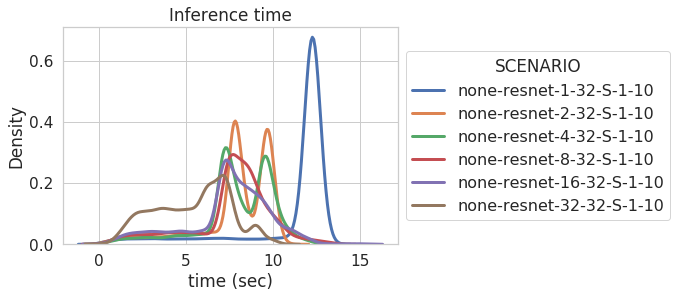

cpumem
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/cpumem-resnet-1-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
12.791194802
12.072560914
10.825017746122136
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/cpumem-resnet-2-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
10.526832658
7.122965339
6.480461485821643
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/cpumem-resnet-4-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
10.304541494
6.78723472
6.0752210803258135
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/cpumem-resnet-8-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
12.05822211
6.526546851
5.984303800853562
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/outp

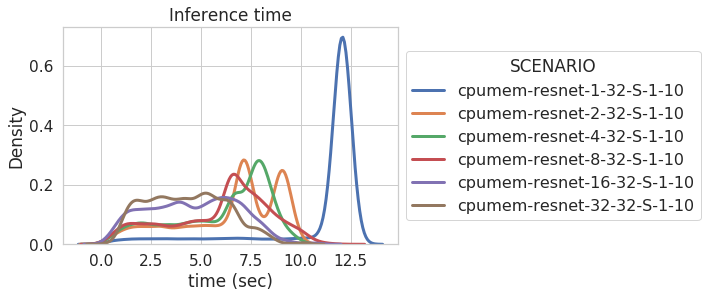

cpumemory
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/cpumemory-resnet-1-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
13.007725739
12.227220295
10.974932989155487
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/cpumemory-resnet-2-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
10.295519158
7.229530326
6.506912505809385
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/cpumemory-resnet-4-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
11.437225401
6.515754196
6.168836007087947
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/cpumemory-resnet-8-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
11.495279532
6.642263814
6.072602048748862
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_an

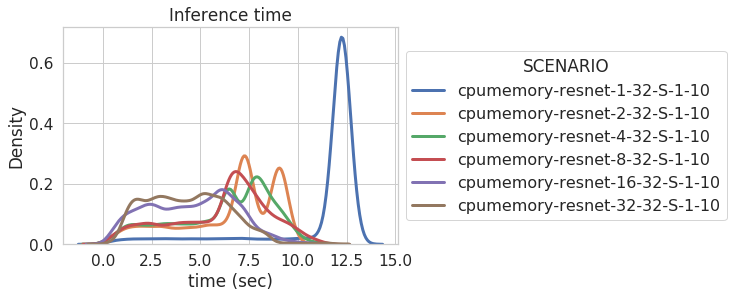

In [531]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]

for sc in ['none','cpumem','cpumemory']:
    print(sc)
    SCEN=[sc+'-resnet-1-32-S-1-10',
          sc+'-resnet-2-32-S-1-10',
             sc+'-resnet-4-32-S-1-10',
               sc+'-resnet-8-32-S-1-10',
          sc+'-resnet-16-32-S-1-10',
          sc+'-resnet-32-32-S-1-10']
    x=0
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["Latency"])]
        print(max(df1['issue_to_done']))
        print(np.median(df1['issue_to_done']))
        print(np.mean(df1['issue_to_done']))
    #     ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
    #     ax.set_title('Inference time (usec)');
    #     x = x+1
    #     plt.show()

        # Draw the density plot
        sns.distplot(df1['issue_to_done'], hist = False, kde = True,
                     kde_kws = {'linewidth': 3},
                     label = SCEN[x])
        x=x+1

    # Plot formatting
    plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.title('Inference time')
    plt.xlabel('time (sec)')
    plt.ylabel('Density')
    plt.show()

none
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-1-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-2-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-4-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-8-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-16-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-

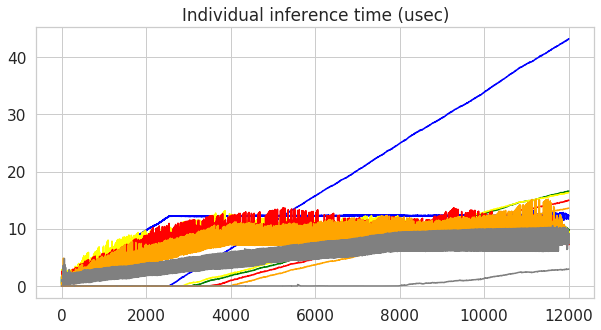

cpumem
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/cpumem-resnet-1-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/cpumem-resnet-2-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/cpumem-resnet-4-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/cpumem-resnet-8-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/cpumem-resnet-16-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detec

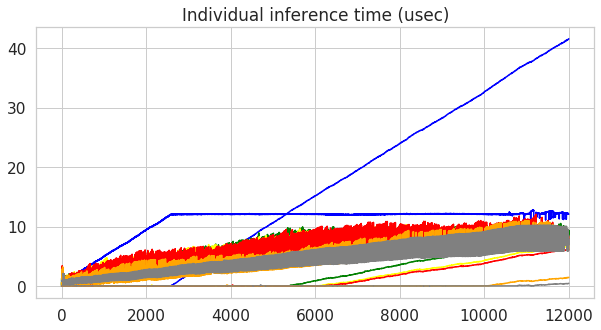

cpumemory
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/cpumemory-resnet-1-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/cpumemory-resnet-2-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/cpumemory-resnet-4-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/cpumemory-resnet-8-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/cpumemory-resnet-16-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classi

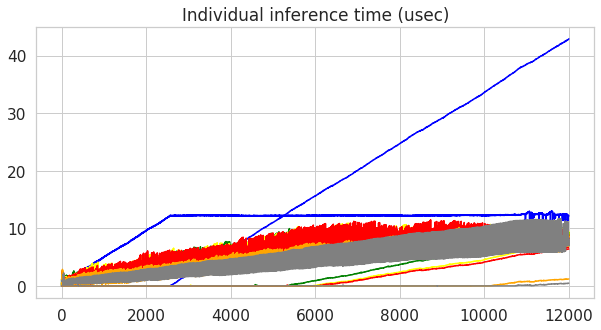

In [532]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
for sc in ['none','cpumem','cpumemory']:
    print(sc)
    SCEN=[sc+'-resnet-1-32-S-1-10',
          sc+'-resnet-2-32-S-1-10',
             sc+'-resnet-4-32-S-1-10',
               sc+'-resnet-8-32-S-1-10',
          sc+'-resnet-16-32-S-1-10',
          sc+'-resnet-32-32-S-1-10']
    x=0
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["Latency"])]
        df1.reset_index(drop=True,inplace=True)
        ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x])
        ax = df1['issue_delay'].plot(figsize=figsize, color=color[x])
        ax.set_title('Individual inference time (usec)');
    #     ax.set(ylim=(0, 100))
        x=x+1
    plt.show()

In [469]:
# df1 = df[df["name"].isin(["Latency"])]
# ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
# ax.set_title('Inference time (usec)');
# #ax.set(xlim=(0, 25000))
# plt.xticks(rotation=60)
# plt.show()

# ax = df1['issue_to_done'].plot(figsize=figsize)
# ax.set_title('Individual inference time (usec)');
# #ax.set(ylim=(0, 200))
# plt.show()


# # df1['issue_to_done'].describe()

In [468]:
# df1 = df[df["name"].isin(["QuerySamplesComplete"])]
# df1['delta'] = df1['ts'].diff()
# ax = df1['delta'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
# ax.set_title('Time between QuerySamplesComplete (usec)');
# plt.show()

# ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
# ax.set_title('Time QuerySamplesComplete (usec)');

# offline scenario

In [533]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
SCEN=[
    'none-resnet-1-32-O-1-10',
      'none-resnet-2-32-O-1-10',
            'none-resnet-4-32-O-1-10',
           'none-resnet-8-32-O-1-10',
      'none-resnet-16-32-O-1-10',
      'none-resnet-32-32-O-1-10'
]
x=0
for add in SCEN:
    df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/"+add+"/mlperf_log_trace.json")
    df1 = df[df["name"].isin(["IssueQuery"])]
    print(df1)
#     ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
#     ax.set_title('IssueQuery duration (usec)');
#     x=x+1
#     plt.show()

# df1['delta'].describe()

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-1-32-O-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
               ts        name           dur  issue_start_ns  complete_ns  \
46592  167409.695  IssueQuery  2.226891e+08             NaN          NaN   

       issue_to_done  
46592            NaN  
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-2-32-O-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
               ts        name           dur  issue_start_ns  complete_ns  \
46594  182404.083  IssueQuery  1.674079e+08             NaN          NaN   

       issue_to_done  
46594            NaN  
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-4-32-O-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
               ts        name           dur  issue_start_ns  comp

In [280]:
# # for SingleStream
# if True:
#     df1 = df[df["name"].isin(["QuerySamplesComplete"])]
#     ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
#     ax.set_title('Inference time (usec)');
#     plt.show()
#     ax = df1['dur'].plot(figsize=figsize)
#     ax.set(ylim=(0, 600))
#     ax.set_title('Individual inference time (usec)');

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-1-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
127.833
10.5115
12.462266927083325
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-2-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
84.815
10.3185
10.782372395833333
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-4-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
114.674
10.498000000000001
12.094303385416675
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-8-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
124.038
10.9745
12.852624999999998
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-16-32-O-32-10

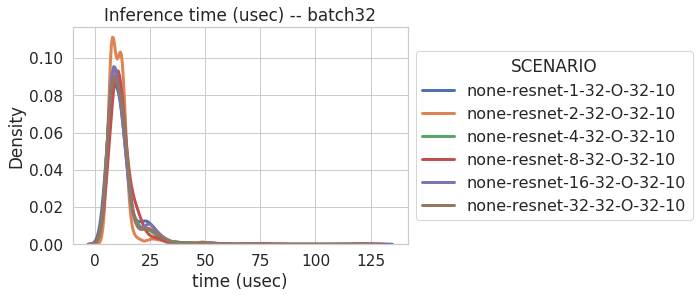

In [476]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
for batch in ['32']:
    SCEN=[
        'none-resnet-1-32-O-'+batch+'-10',
          'none-resnet-2-32-O-'+batch+'-10',
                'none-resnet-4-32-O-'+batch+'-10',
               'none-resnet-8-32-O-'+batch+'-10',
          'none-resnet-16-32-O-'+batch+'-10',
          'none-resnet-32-32-O-'+batch+'-10'
    ]
    x=0
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["QuerySamplesComplete"])]
        print(max(df1['dur']))
        print(np.median(df1['dur']))
        print(np.mean(df1['dur']))
    #     ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
    #     ax.set_title('Inference time (usec)');
    #     x = x+1
    #     plt.show()

        # Draw the density plot
        sns.distplot(df1['dur'], hist = False, kde = True,
                     kde_kws = {'linewidth': 3},
                     label = SCEN[x])
        x=x+1

    # Plot formatting
    plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.title('Inference time (usec) -- batch'+str(batch))
    plt.xlabel('time (usec)')
    plt.ylabel('Density')
    plt.show()

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-1-32-O-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-2-32-O-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-4-32-O-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-8-32-O-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-16-32-O-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22

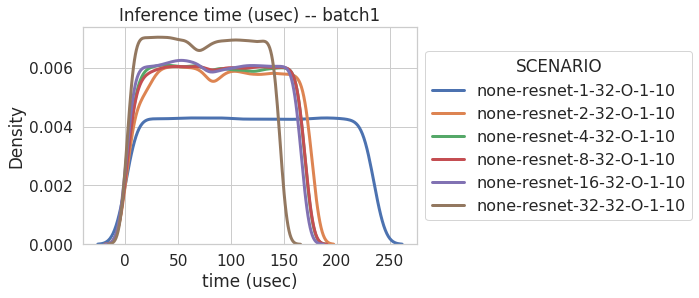

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-1-32-O-2-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-2-32-O-2-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-4-32-O-2-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-8-32-O-2-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-16-32-O-2-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22

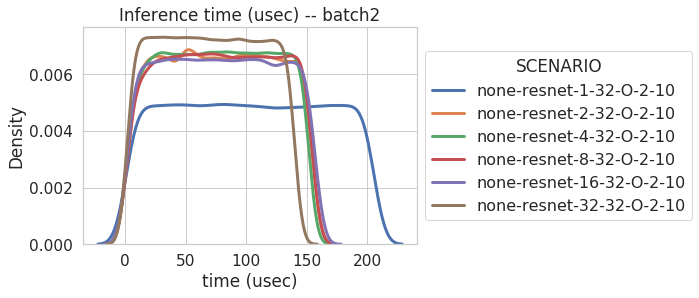

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-1-32-O-4-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-2-32-O-4-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-4-32-O-4-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-8-32-O-4-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-16-32-O-4-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22

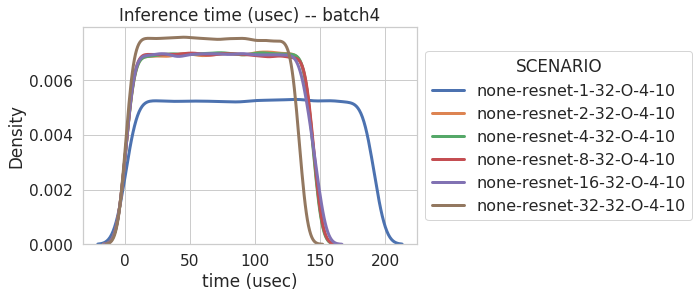

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-1-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-2-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-4-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-8-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-16-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22

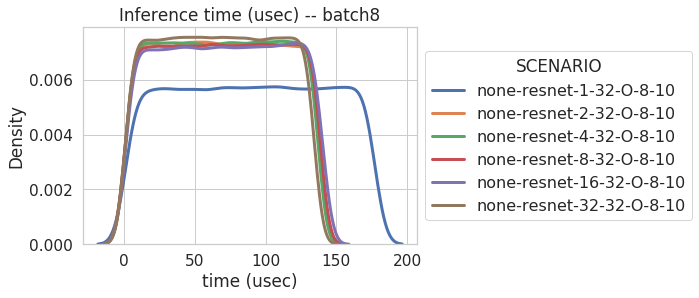

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-1-32-O-16-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-2-32-O-16-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-4-32-O-16-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-8-32-O-16-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-16-32-O-16-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-

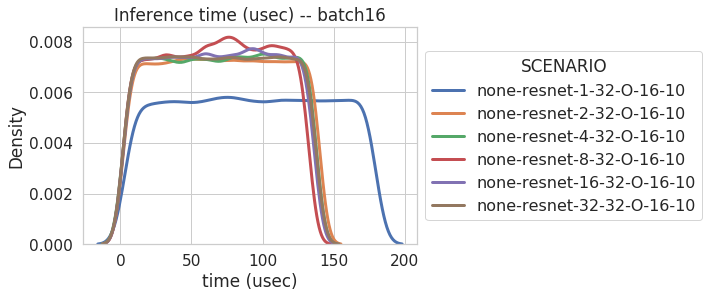

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-1-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-2-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-4-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-8-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-16-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-

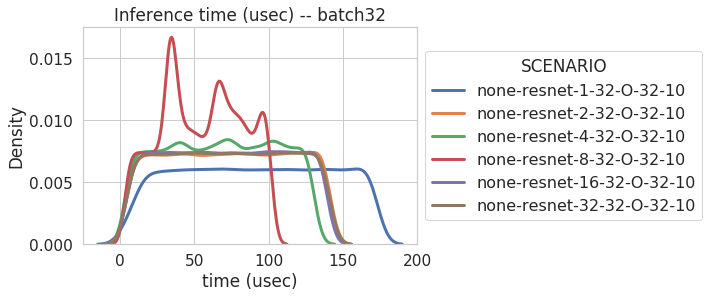

In [534]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
for batch in ['1','2','4','8','16','32']:
    SCEN=[
        'none-resnet-1-32-O-'+batch+'-10',
          'none-resnet-2-32-O-'+batch+'-10',
                'none-resnet-4-32-O-'+batch+'-10',
               'none-resnet-8-32-O-'+batch+'-10',
          'none-resnet-16-32-O-'+batch+'-10',
          'none-resnet-32-32-O-'+batch+'-10'
    ]
    x=0
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["Sample"])]
#         print(max(df1['dur']))
#         print(np.median(df1['dur']))
#         print(np.mean(df1['dur']))
    #     ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
    #     ax.set_title('Inference time (usec)');
    #     x = x+1
    #     plt.show()

        # Draw the density plot
        sns.distplot(df1['issue_to_done'], hist = False, kde = True,
                     kde_kws = {'linewidth': 3},
                     label = SCEN[x])
        x=x+1

    # Plot formatting
    plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.title('Inference time (usec) -- batch'+str(batch))
    plt.xlabel('time (usec)')
    plt.ylabel('Density')
    plt.show()

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-1-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-2-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-4-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-8-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-16-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-

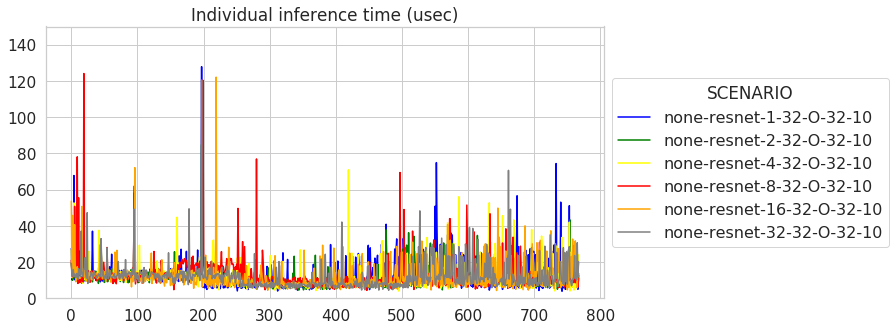

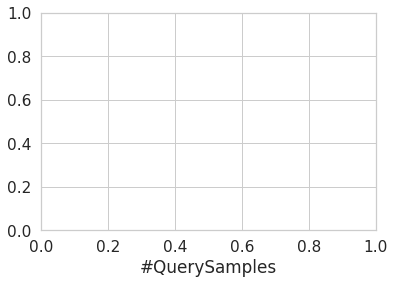

In [535]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
for batch in ['32']:
    SCEN=[
        'none-resnet-1-32-O-'+batch+'-10',
          'none-resnet-2-32-O-'+batch+'-10',
                'none-resnet-4-32-O-'+batch+'-10',
               'none-resnet-8-32-O-'+batch+'-10',
          'none-resnet-16-32-O-'+batch+'-10',
          'none-resnet-32-32-O-'+batch+'-10'
    ]
    x=0
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["QuerySamplesComplete"])]
        df1.reset_index(drop=True,inplace=True)
        ax = df1['dur'].plot(figsize=figsize, color=color[x],label = SCEN[x])
        ax.set_title('Individual inference time (usec)');
        ax.set(ylim=(0, 150))
        x=x+1
    plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.show()
    plt.xlabel('#QuerySamples')

In [536]:
df1 = df[df["name"].isin(["Sample"])]
len(df1)

24576

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-1-32-O-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-2-32-O-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-4-32-O-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-8-32-O-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-16-32-O-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classificat

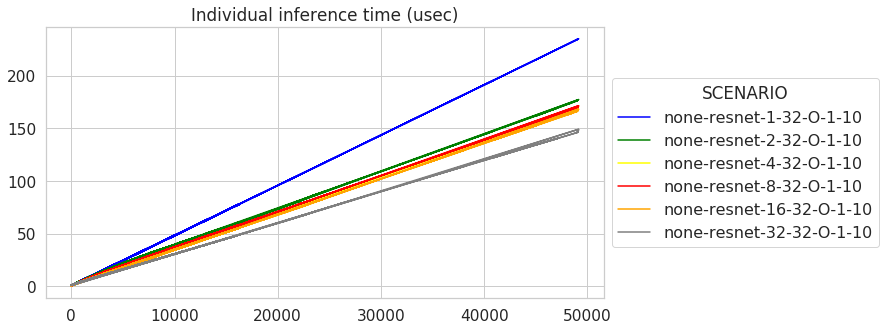

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-1-32-O-2-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-2-32-O-2-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-4-32-O-2-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-8-32-O-2-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-16-32-O-2-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classificat

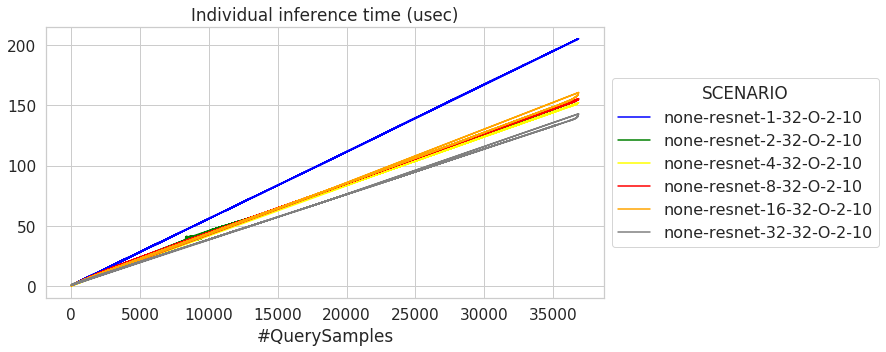

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-1-32-O-4-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-2-32-O-4-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-4-32-O-4-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-8-32-O-4-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-16-32-O-4-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classificat

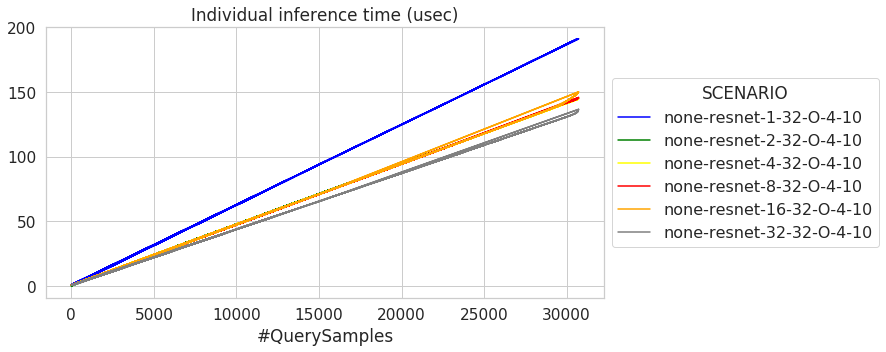

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-1-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-2-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-4-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-8-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-16-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classificat

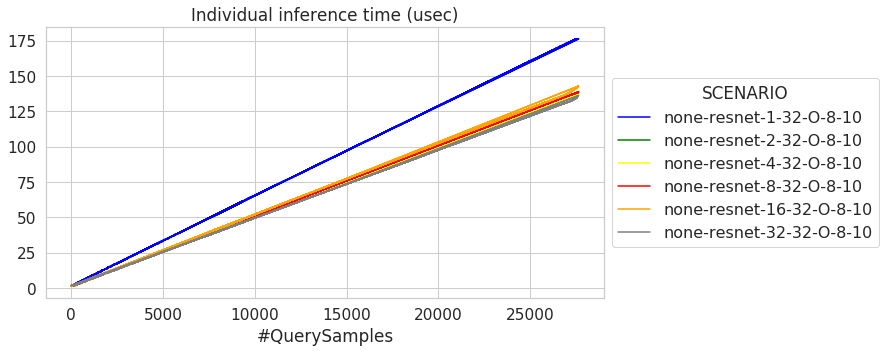

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-1-32-O-10-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-2-32-O-10-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-4-32-O-10-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-8-32-O-10-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-16-32-O-10-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classi

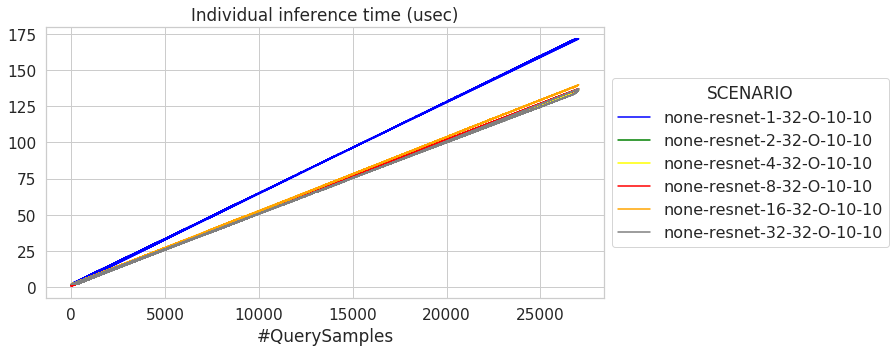

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-1-32-O-16-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-2-32-O-16-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-4-32-O-16-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-8-32-O-16-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-16-32-O-16-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classi

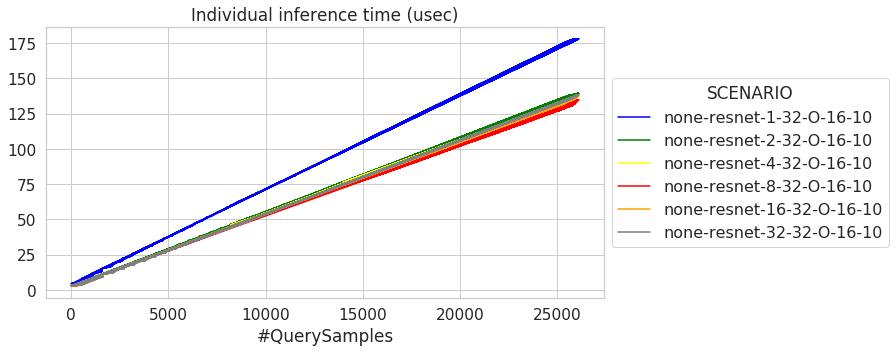

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-1-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-2-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-4-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-8-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-16-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
24576
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classi

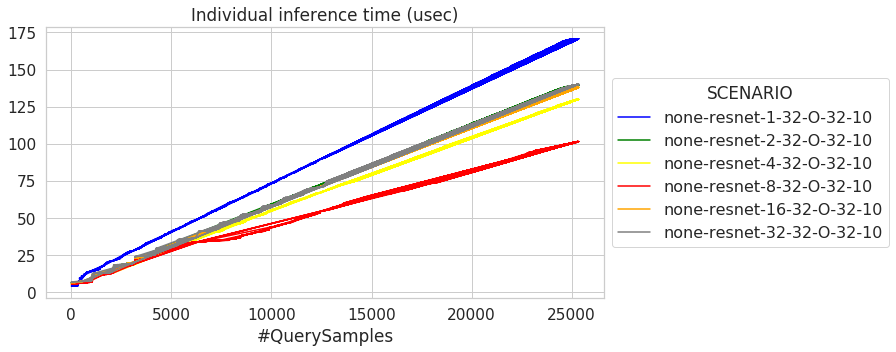

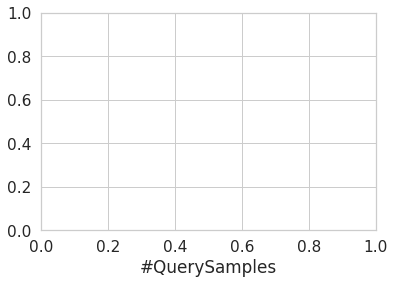

In [538]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
for batch in ['1','2','4','8','10','16','32']:
    SCEN=[
        'none-resnet-1-32-O-'+batch+'-10',
          'none-resnet-2-32-O-'+batch+'-10',
                'none-resnet-4-32-O-'+batch+'-10',
               'none-resnet-8-32-O-'+batch+'-10',
          'none-resnet-16-32-O-'+batch+'-10',
          'none-resnet-32-32-O-'+batch+'-10'
    ]
    x=0
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["Sample"])]
        print(len(df1))
#         df1.reset_index(drop=True,inplace=True)
        ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = SCEN[x])
        ax.set_title('Individual inference time (usec)');
#         ax.set(ylim=(0, 150))
        x=x+1
    plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.show()
    plt.xlabel('#QuerySamples')

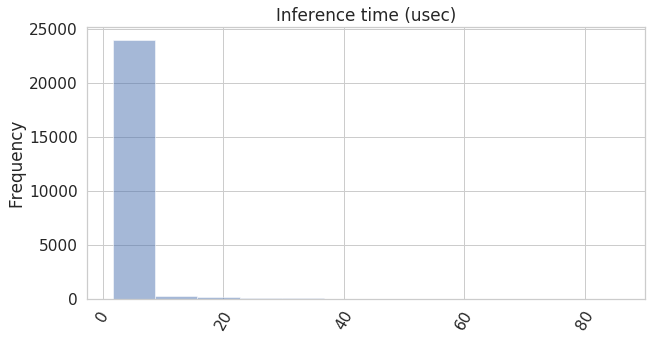

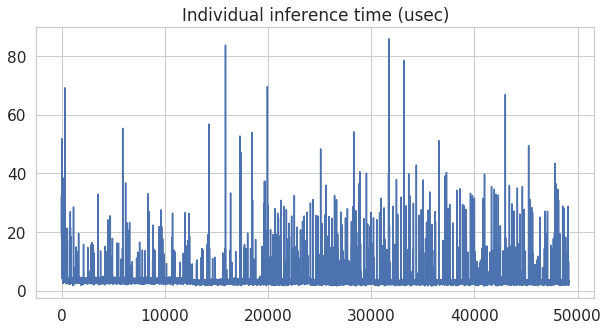

In [312]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Inference time (usec)');
#ax.set(xlim=(0, 25000))
plt.xticks(rotation=60)
plt.show()

ax = df1['dur'].plot(figsize=figsize)
ax.set_title('Individual inference time (usec)');
#ax.set(ylim=(0, 200))
plt.show()


# df1['issue_to_done'].describe()

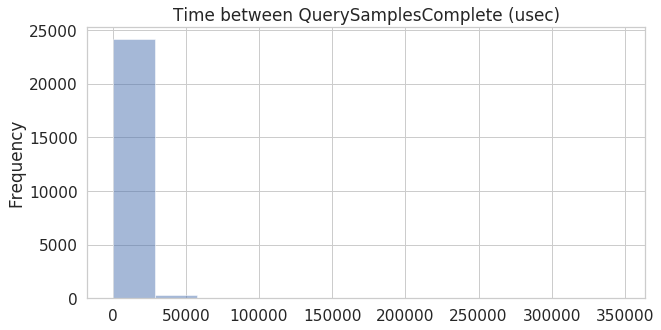

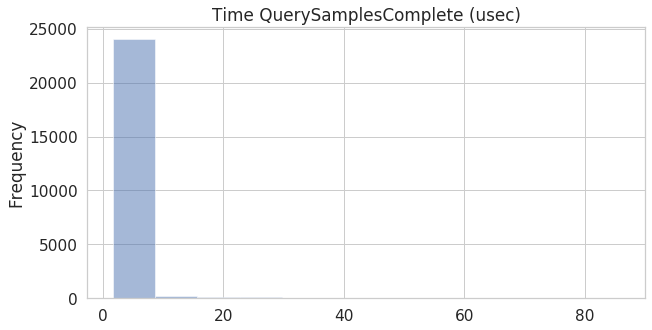

In [313]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
df1['delta'] = df1['ts'].diff()
ax = df1['delta'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Time between QuerySamplesComplete (usec)');
plt.show()

ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Time QuerySamplesComplete (usec)');